#### Importing Packages

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('weatherAUS.csv')
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [28]:
data.shape

(145460, 23)

In [4]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [14]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']
print(f"No of feature: {len(numerical_feature)}")
print(f"Numerical feature: {numerical_feature}")

No of feature: 16
Numerical feature: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [17]:
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique())<25]
print(f"No of feature: {len(discrete_feature)}")
print(f"Discrete feature: {discrete_feature}")

No of feature: 2
Discrete feature: ['Cloud9am', 'Cloud3pm']


In [20]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print(f"No of feature: {len(continuous_feature)}")
print(f"Continuous feature: {continuous_feature}")

No of feature: 14
Continuous feature: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [24]:
categorical_feature = [feature for feature in data.columns if feature not in numerical_feature]
print(f"No of feature: {len(categorical_feature)}")
print(f"Categorical feature: {categorical_feature}")

No of feature: 7
Categorical feature: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


#### EDA 

In [71]:
px.bar(data_frame=data, x='RainToday')

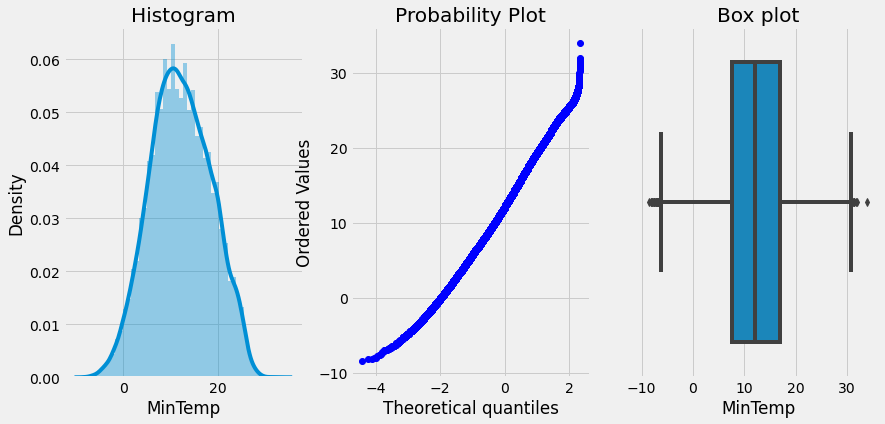

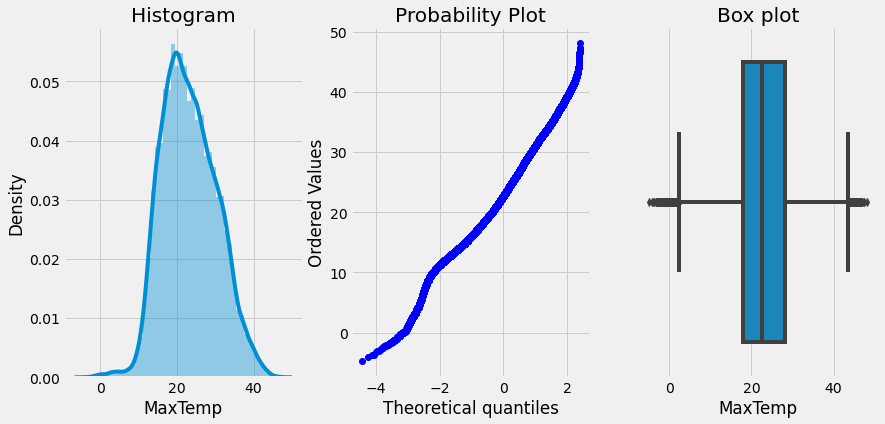

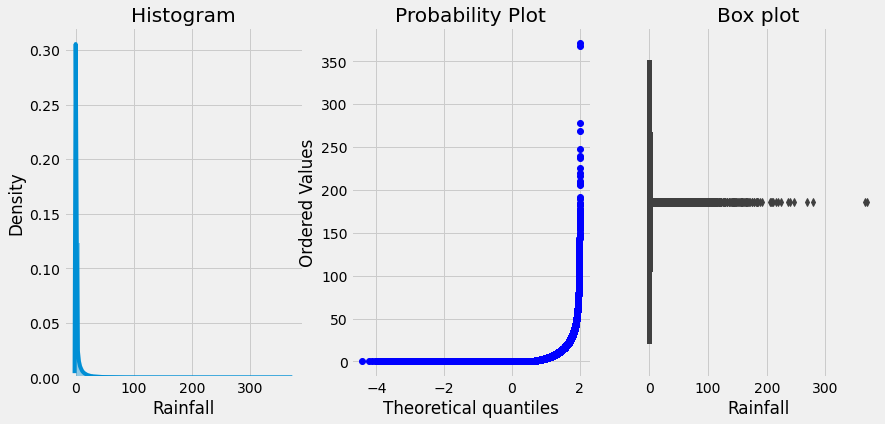

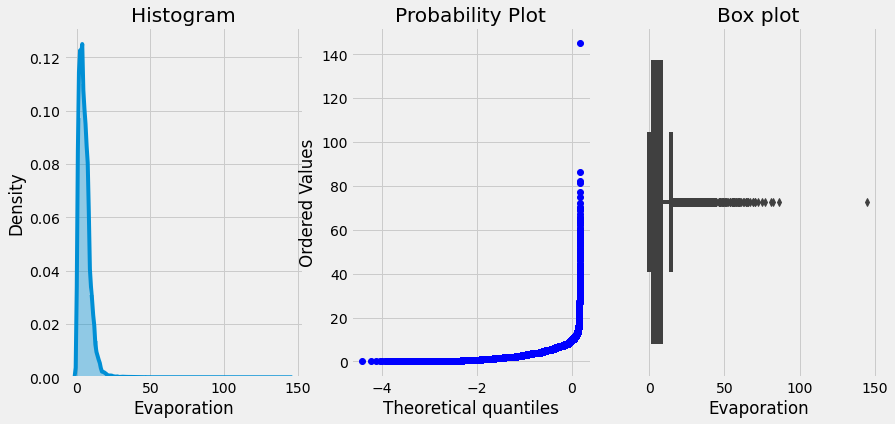

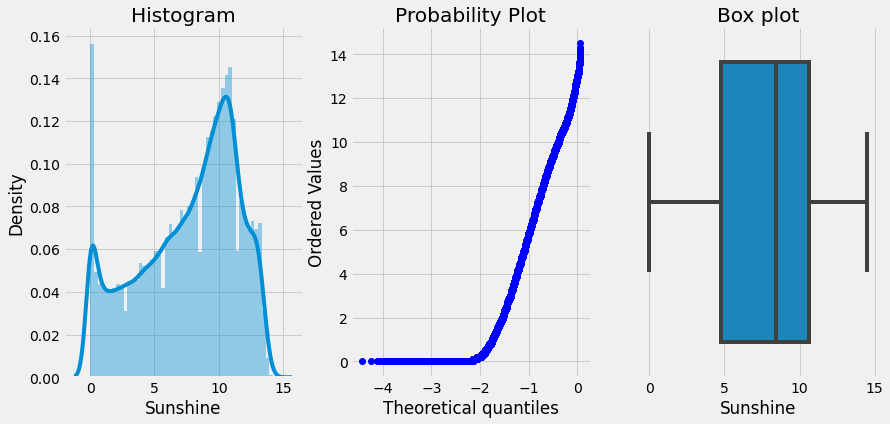

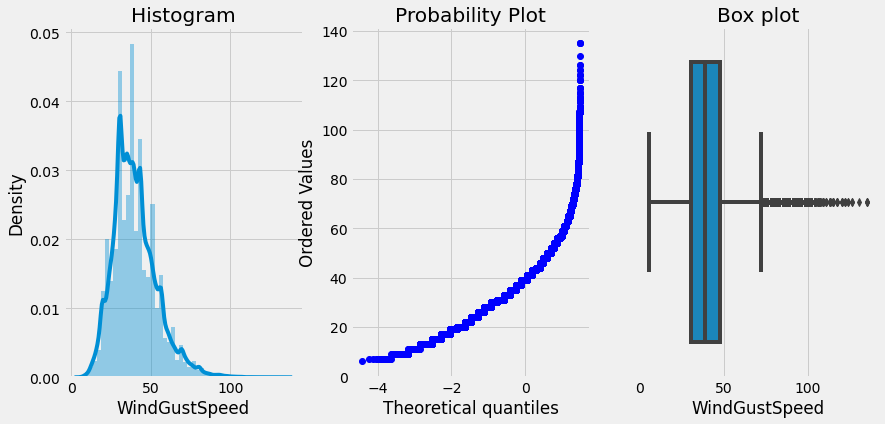

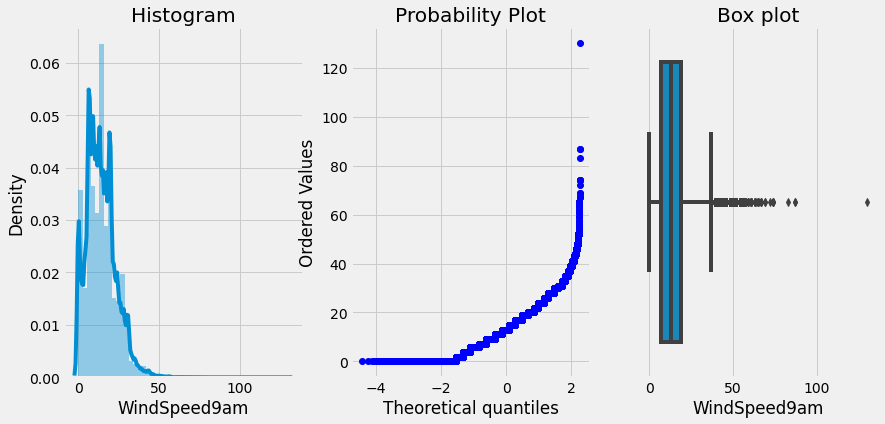

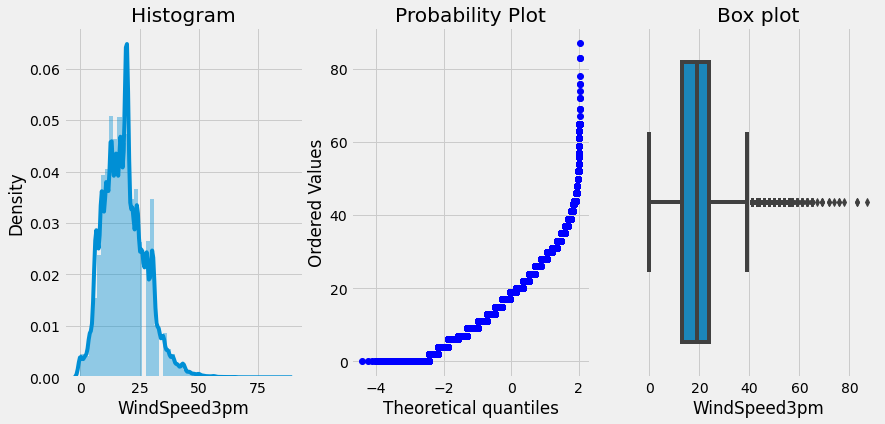

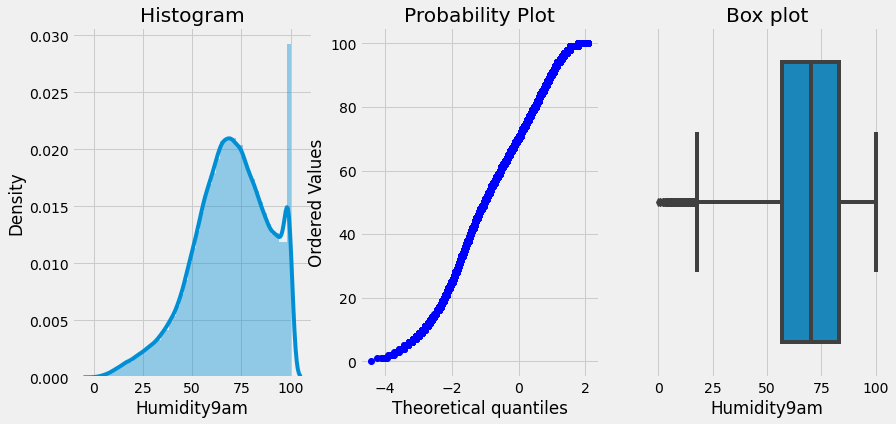

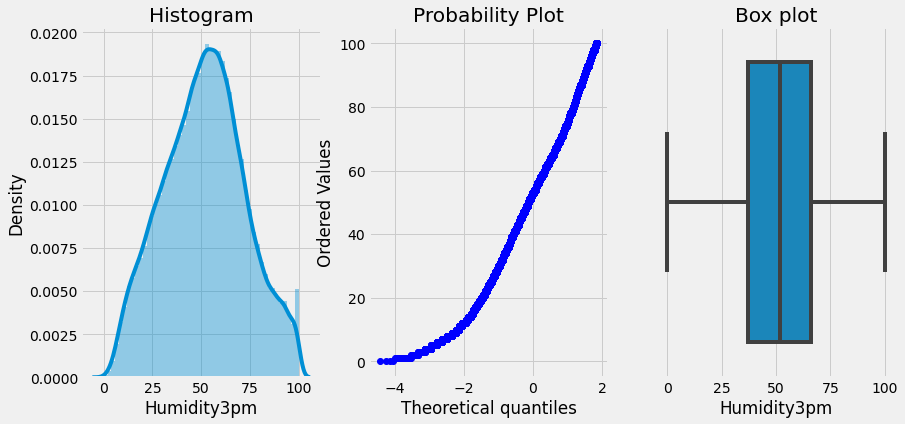

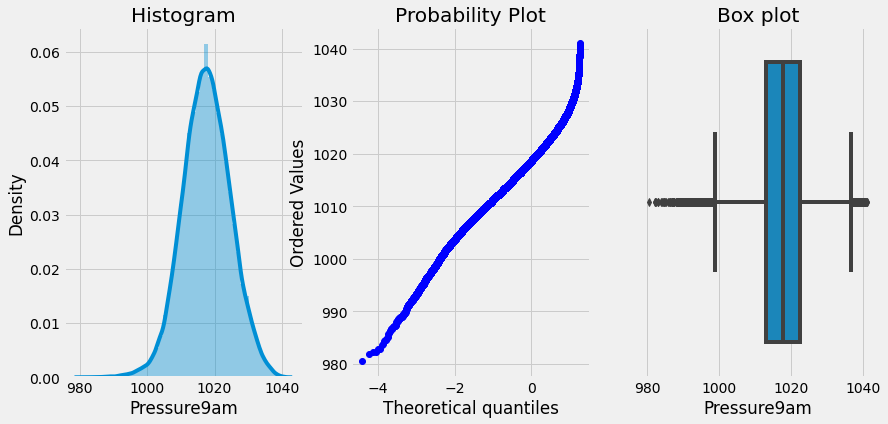

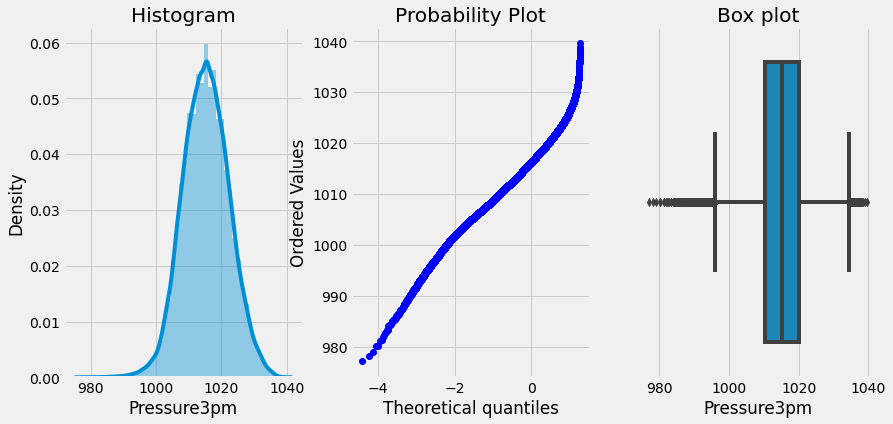

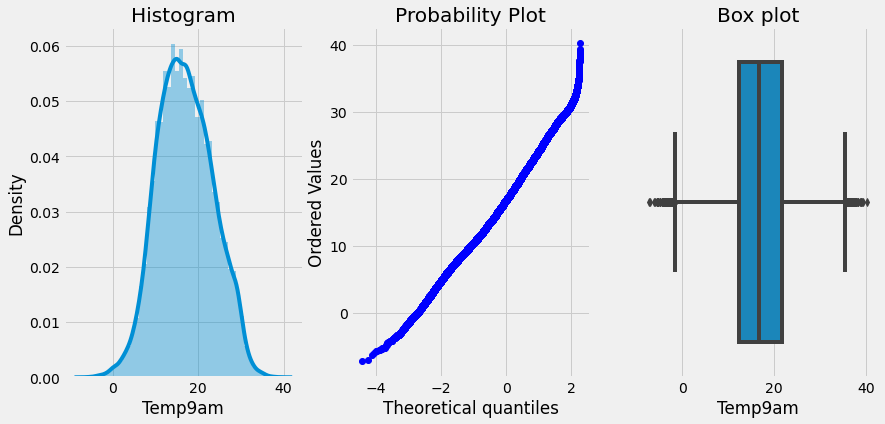

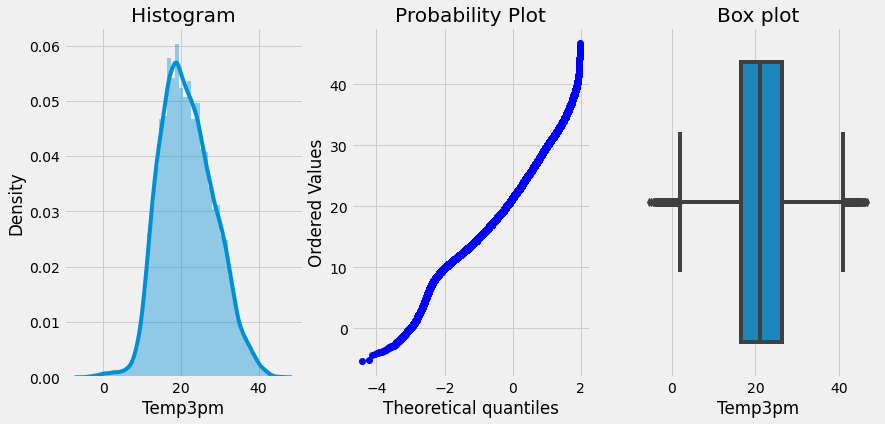

In [57]:
# plotting continuous feature using histplot, boxplot and distribution of feature 
for feature in continuous_feature:
    df = data.copy()
    plt.figure(figsize=(13,6))
    plt.style.use("fivethirtyeight")
    
    plt.subplot(1,3,1)
    sns.distplot(df[feature], bins=50)
    plt.title('Histogram')
    
    plt.subplot(1,3,2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title('Probability Plot')
    
    plt.subplot(1,3,3)
    sns.boxplot(df[feature])
    plt.title('Box plot')

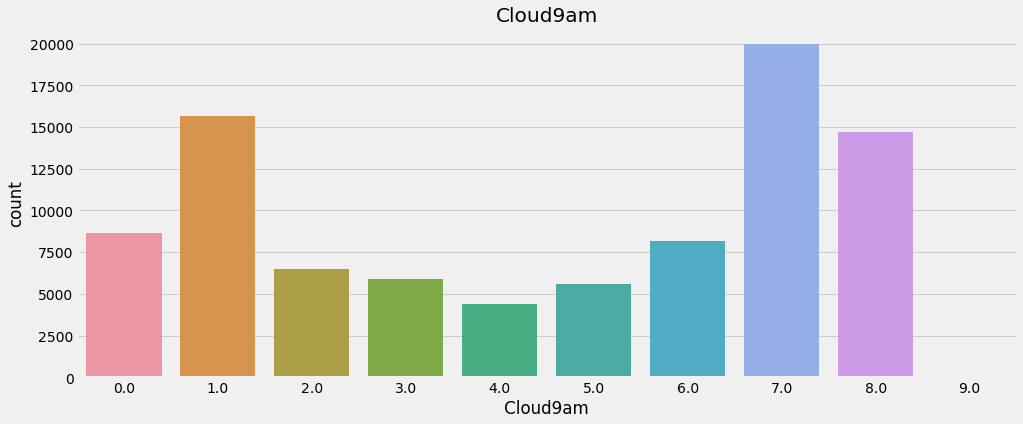

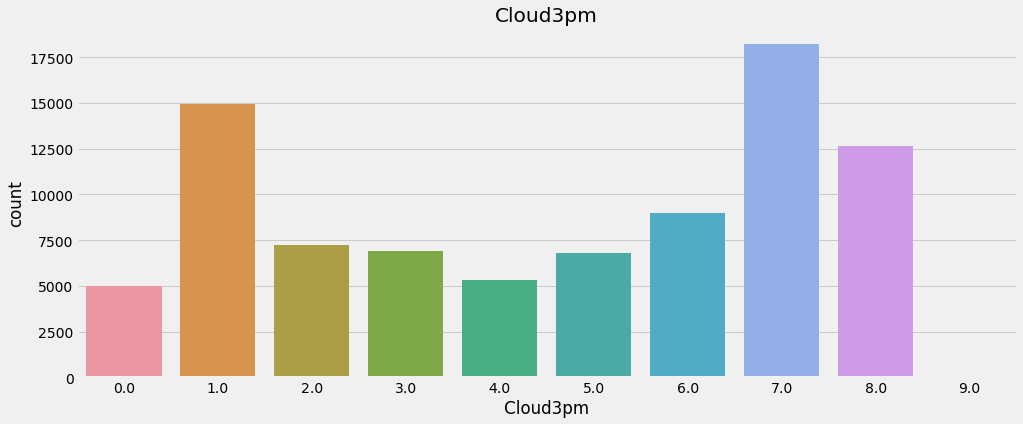

In [56]:
# Plotting the discrete feature
for feature in discrete_feature:
    df = data.copy()
    plt.style.use("fivethirtyeight")
    
    plt.figure(figsize=(15,6))
    sns.countplot(df[feature])
    plt.xlabel(feature)
    plt.title(feature)

In [50]:
for feature in categorical_feature:
    print(data[feature].value_counts())

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009